In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Read image

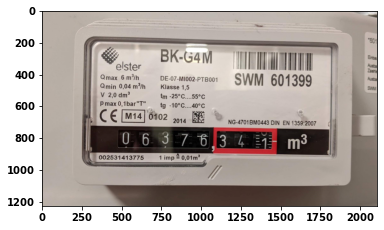

In [37]:
img_bgr = cv.imread('gas_sample.jpg', cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)  # opencv reads colors in BGR
plt.imshow(img_rgb);

# Fokus on red color

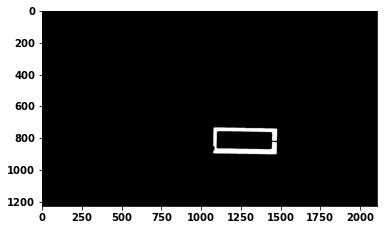

In [75]:
def fokus_red(img):
    bg = img[:,:,:2].mean(axis=2)
    red = img[:,:,2]
    reddish = np.maximum(red-bg, np.zeros_like(red))
    return np.array(reddish, dtype=np.uint8)

img_red = fokus_red(img_bgr)
_, img_otsu = cv.threshold(img_red, 0, 255, cv.THRESH_OTSU)
plt.imshow(img_otsu, plt.cm.gray);

## Find coutours

len(contours)=1


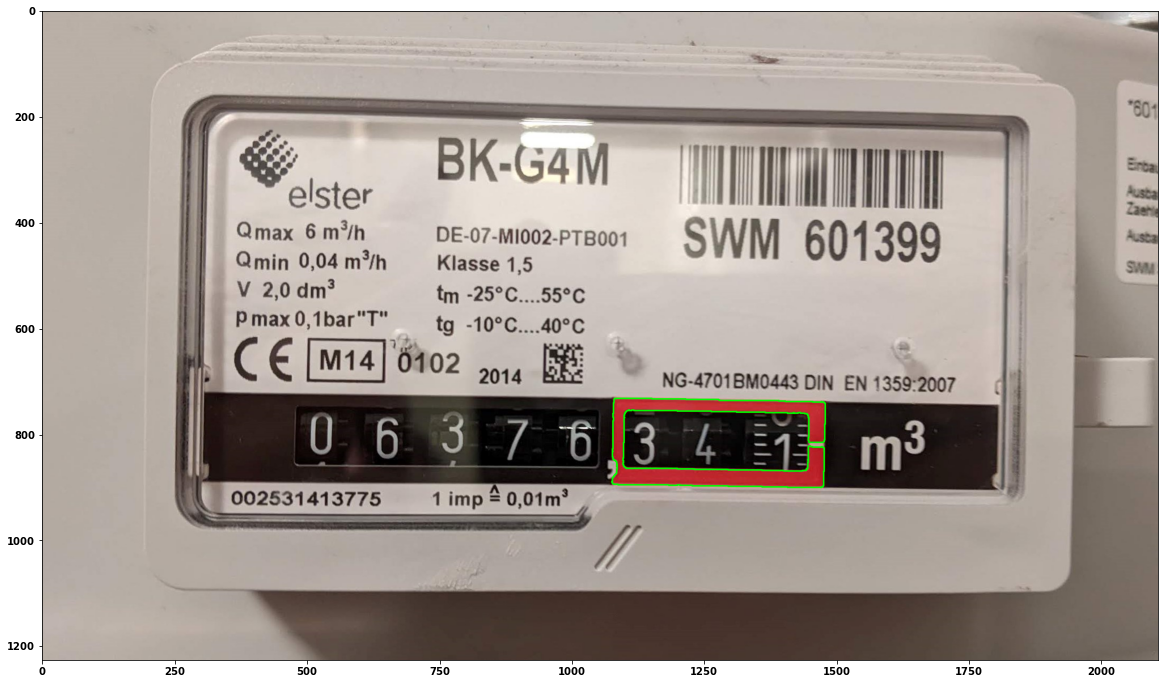

In [74]:
contours, _ = cv.findContours(img_otsu, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print(f"{len(contours)=}")
img_copy = img_rgb.copy()
cv.drawContours(img_copy, contours, -1, (0, 255, 0), 2)
plt.figure(figsize=(20, 15)), plt.imshow(img_copy);

## Contour simplification
1.) Apply convex hull
https://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.html

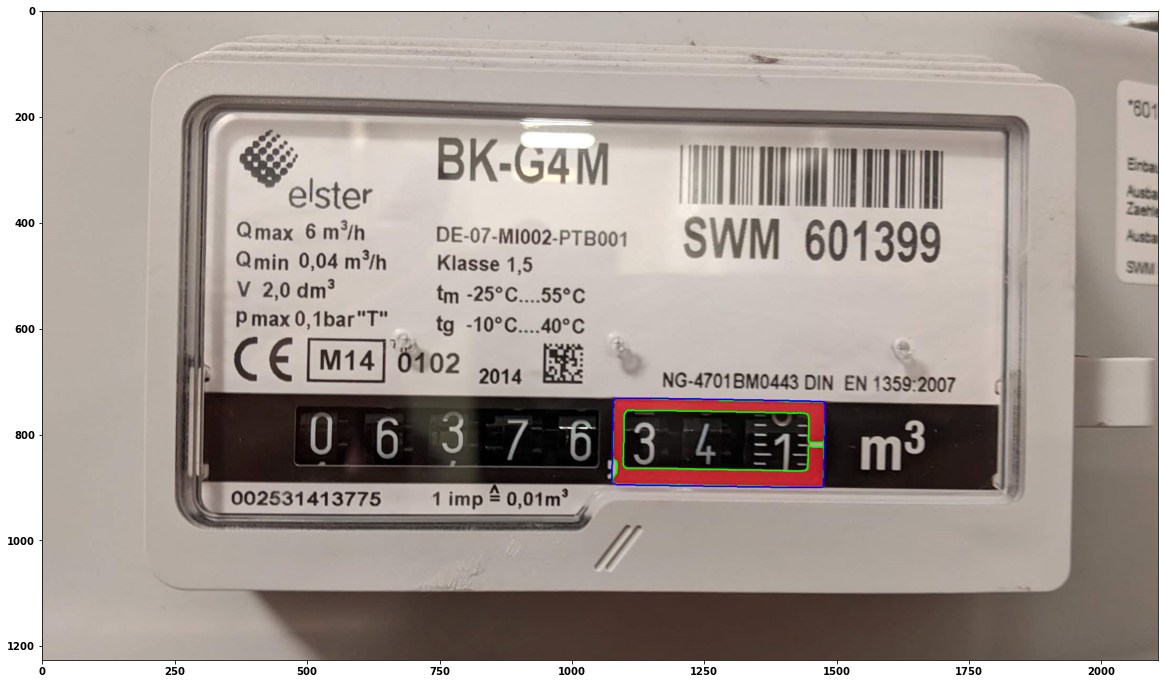

In [77]:
hulls = [cv.convexHull(contour) for contour in contours]
img_copy = img_rgb.copy()
cv.drawContours(img_copy, contours, -1, (0, 255, 0), 2)
cv.drawContours(img_copy, hulls, -1, (0, 0, 255), 2)
plt.figure(figsize=(20, 15)), plt.imshow(img_copy);

### 2. Contour approximation

In [84]:
conts = hulls
if len(conts) == 1:
    print("one red contour found, perfekt!")
else:
    print(f"{len(conts)=} found, expected 1!")

for i, cont in enumerate(conts):
    print(f"{i+1}. hull: {len(cont)=}, ", end="")
    if len(cont) == 4:
        print("perfect!")
    else:
        print("too many point!")    

one red contour found, perfekt!
1. hull: len(cont)=24, too many point!


In [85]:
approximations = []
for hull in hulls:
    epsilon = 0.1 * cv.arcLength(hull, True)
    apx = cv.approxPolyDP(hull, epsilon, True)
    approximations.append(apx)

conts = approximations
for i, cont in enumerate(conts):
    print(f"{i+1}. hull: {len(cont)=}, ", end="")
    if len(cont) == 4:
        print("perfect!")
    else:
        print("too many point!")   

1. hull: len(cont)=4, perfect!


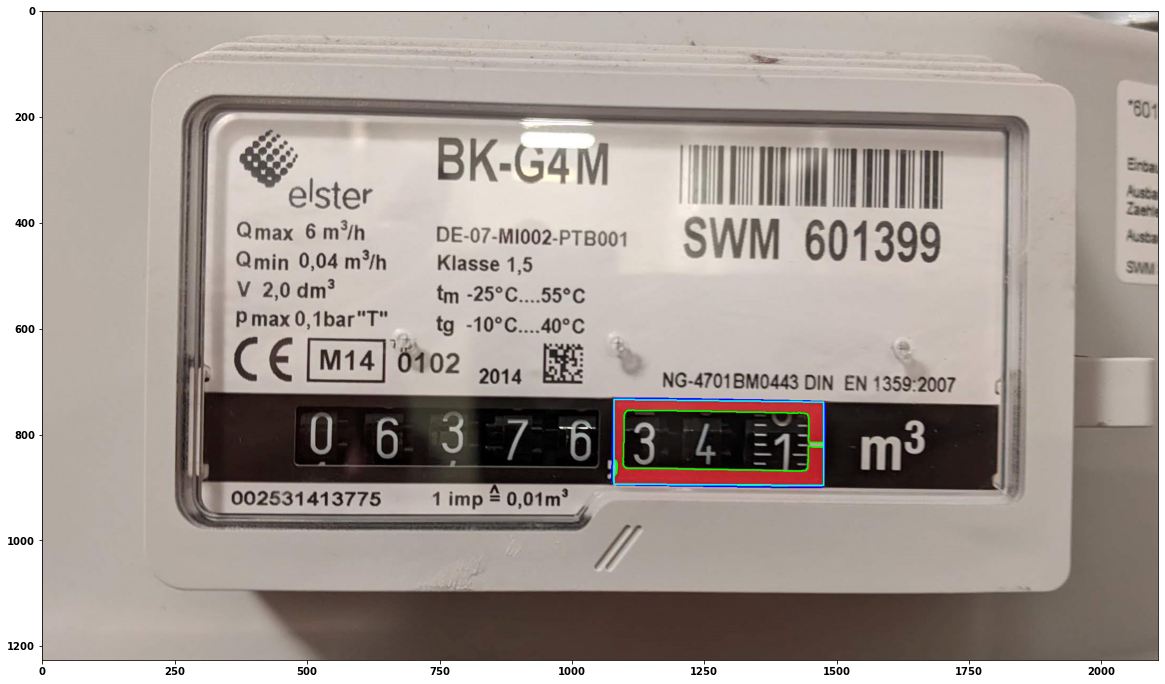

In [86]:
img_copy = img_rgb.copy()
cv.drawContours(img_copy, contours, -1, (0, 255, 0), 2)
cv.drawContours(img_copy, hulls, -1, (0, 0, 255), 2)
cv.drawContours(img_copy, approximations, -1, (0, 255, 255), 2)
plt.figure(figsize=(20, 15)), plt.imshow(img_copy);

In [5]:
print(f"{1/3 :.0f}")

0
